In [1]:
from google.colab import files
files.upload()

Saving Toxic_comment.zip to Toxic_comment.zip


In [2]:
! unzip Toxic_comment.zip

Archive:  Toxic_comment.zip
   creating: Toxic_comment/
   creating: Toxic_comment/sumission.csv/
  inflating: Toxic_comment/sumission.csv/sample_submission.csv  
   creating: Toxic_comment/test.csv/
  inflating: Toxic_comment/test.csv/test.csv  
   creating: Toxic_comment/test_labels/
  inflating: Toxic_comment/test_labels/test_labels.csv  
   creating: Toxic_comment/train.csv/
  inflating: Toxic_comment/train.csv/train.csv  


In [3]:
#importing necessary libraries
from tensorflow.keras.utils import to_categorical
import plotly.express as px
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from wordcloud import WordCloud 
import plotly.express as px
import plotly.graph_objects as go
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')


In [4]:
for dirname, _, filenames in os.walk('Toxic_comment'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Toxic_comment/test.csv/test.csv
Toxic_comment/test_labels/test_labels.csv
Toxic_comment/train.csv/train.csv
Toxic_comment/sumission.csv/sample_submission.csv


In [5]:

train=pd.read_csv("Toxic_comment/train.csv/train.csv")
test=pd.read_csv("Toxic_comment/test.csv/test.csv")
submission=pd.read_csv("Toxic_comment/sumission.csv/sample_submission.csv")


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
train.shape

(159571, 8)

In [8]:
test.shape

(153164, 2)

In [9]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
#checking null values in train data
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [11]:
#checking null values in test data
test.isnull().sum()


id              0
comment_text    0
dtype: int64

In [15]:
#printingcolumnsindata
print ("Columns")
train.columns

Columns


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

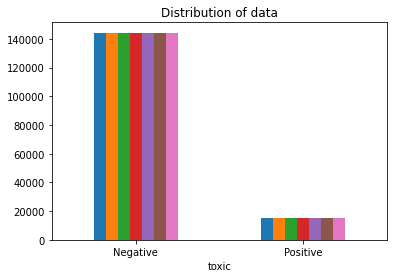

In [17]:
# Plotting the distribution for dataset.
ax = train.groupby('toxic').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(train['comment_text']), list(train['toxic'])

#EDA

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [19]:
#Wordcloud of all comments
def words(x):
    if type(x) == str:
        return x.replace("\n", "")
    else:
        return ""

text = ' '.join([words(abstract) for abstract in train["comment_text"]])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
fig = px.imshow(wordcloud)
fig.update_layout(title_text='Common words in comments')

Output hidden; open in https://colab.research.google.com to view.

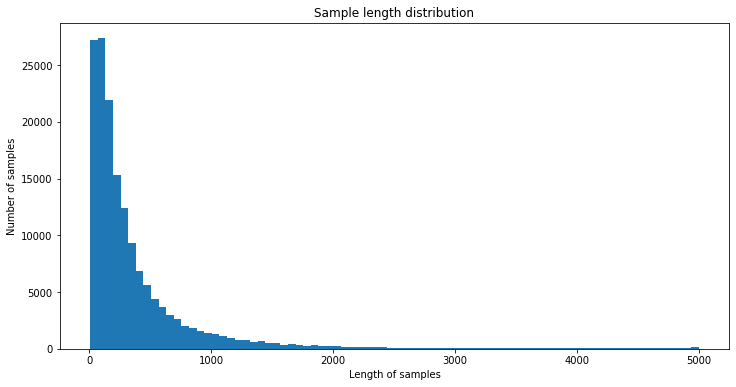

In [20]:

# Now, let's see the average number of words per sample
plt.figure(figsize=(12, 6))
plt.hist([len(sample) for sample in list(train['comment_text'])], 80)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [21]:
print("There are %.2f%% toxic comments in the training data."%(train['toxic'].value_counts()[1]/train['toxic'].value_counts()[0]*100))
print("There are %.2f%% severe comments in the training data."%(train['severe_toxic'].value_counts()[1]/train['severe_toxic'].value_counts()[0]*100))
print("There are %.2f%% obscene comments in the training data."%(train['obscene'].value_counts()[1]/train['obscene'].value_counts()[0]*100))
print("There are %.2f%% threat comments in the training data."%(train['threat'].value_counts()[1]/train['threat'].value_counts()[0]*100))
print("There are %.2f%% insult comments in the training data."%(train['insult'].value_counts()[1]/train['insult'].value_counts()[0]*100))
print("There are %.2f%% identity hate comments in the training data."%(train['identity_hate'].value_counts()[1]/train['identity_hate'].value_counts()[0]*100))

There are 10.60% toxic comments in the training data.
There are 1.01% severe comments in the training data.
There are 5.59% obscene comments in the training data.
There are 0.30% threat comments in the training data.
There are 5.19% insult comments in the training data.
There are 0.89% identity hate comments in the training data.


In [22]:
#Displaying the number of comments per label

df1=pd.DataFrame(train[train.columns[2:]].sum(axis=0)).reset_index()
df1["Label"]=df1["index"]
df1["Count of Comments"]=df1[0]
df1=df1.sort_values(0, ascending=False)
fig = px.bar(df1, x="Label", y="Count of Comments", title="No. of comments per label",color="Count of Comments",text="Count of Comments")
fig.update_traces( textposition='outside')
fig.show()

#**preprocessing**

In [23]:

labels= train.drop(['id','comment_text'],axis=1)

In [24]:
#download stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:

feature= train['comment_text']


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
#removes new line character
train['preprocess'] = train.apply(lambda row: row['comment_text'].replace("\n"," "), axis=1) 
test['preprocess'] = test.apply(lambda row: row['comment_text'].replace("\n"," "), axis=1)


In [28]:
#removes urls and html 
train['preprocess']=train.apply(lambda row: re.sub('http://\S+|https://\S+', 'urls',row['preprocess']).lower(), axis=1)
test['preprocess']=test.apply(lambda row: re.sub('http://\S+|https://\S+', 'urls',row['preprocess']).lower(), axis=1)

In [29]:
#remove all non-alphanumeric values
train['preprocess']=train.apply(lambda row: re.sub('[^A-Za-z\' ]+', '',row['preprocess']).lower(), axis=1)
test['preprocess']=test.apply(lambda row: re.sub('[^A-Za-z\' ]+', '',row['preprocess']).lower(), axis=1)

In [30]:
#remove stopwords 
train['preprocess'] = train['preprocess'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['preprocess'] = test['preprocess'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [31]:
#breaking a text string up into words, phrases, symbols, or other meaningful elements called tokens
train['tokenized_sentences'] = train.apply(lambda row: word_tokenize(row['preprocess']), axis=1)
lengths = [len(line) for line in train["tokenized_sentences"]]

In [32]:
# Applying the tokenization and stopword by ("process") function to yhe comment_text column

train["1_preprocess"] = train.apply(lambda x: x["comment_text"] if len(x["preprocess"])==0 else x['preprocess'], axis=1)
test["1_preprocess"] = test.apply(lambda x: x["comment_text"] if len(x["preprocess"])==0 else x['preprocess'], axis=1)

In [33]:
# new data after preprocessing and removing stop words

new_train=train[['1_preprocess','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
new_test=test[['id','1_preprocess']]

Train & Test

In [34]:
#split the  data to features and target

X_train=new_train["1_preprocess"]
y_train=new_train[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
test_data=new_test["1_preprocess"]

In [35]:
#prepare tokenizer using 30000 words
tokenizer = Tokenizer(num_words = 30000) 
tokenizer.fit_on_texts(X_train)

#convert each text into array of integers with help of tokenizer.
train_final = tokenizer.texts_to_sequences(X_train)
test_final = tokenizer.texts_to_sequences(test_data)

In [36]:
X_train=pad_sequences(train_final, maxlen=200)
test_data=pad_sequences(test_final, maxlen=200)

In [37]:
print(X_train.shape)

(159571, 200)


In [38]:
print(y_train.shape)

(159571, 6)


In [39]:
#Lets create a model and train it
model = Sequential()
model.add(Embedding(30000, 128))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3840000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 4,103,942
Trainable params: 4,103,942
Non-trainable params: 0
_________________________________________________________________


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["AUC"])

In [42]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train,shuffle=True, random_state = 42)

In [43]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


(119678, 200) (119678, 6) (39893, 200) (39893, 6)


In [ ]:

history=model.fit(x_train, y_train, batch_size = 256, epochs = 6, validation_data = (x_val, y_val))

Epoch 1/6
468/468 [==============================] - 2252s 5s/step - loss: 0.1170 - auc: 0.8664 - val_loss: 0.0784 - val_auc: 0.9362
Epoch 2/6
468/468 [==============================] - 2283s 5s/step - loss: 0.0602 - auc: 0.9687 - val_loss: 0.0624 - val_auc: 0.9661
Epoch 3/6
468/468 [==============================] - 2257s 5s/step - loss: 0.0503 - auc: 0.9792 - val_loss: 0.0554 - val_auc: 0.9751
Epoch 4/6
468/468 [==============================] - ETA: 0s - loss: 0.0456 - auc: 0.9833

In [ ]:
model.evaluate(x_val,y_val)

In [ ]:
result = pd.merge(new_test, submission, on = "id")
preds = model.predict(test_data)


In [ ]:
result[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]] = preds
result.drop(["1_preprocess"], axis = 1, inplace = True)
result.to_csv("My_first_submission.csv", index = False)

In [ ]:


plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()